<a href="https://colab.research.google.com/github/fazlerabbi125/BRAC-Implementation-of-ML-models-on-breast-cancer-dataset/blob/main/Implementation_of_Naive_Bayes%2C_KNN%2CRF%2C_and_SVM_on_breast_cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

We are using Random Forest(RF) and Knn classifier here for showing the classification of the [breast_cancer dataset from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

In [1]:
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow.keras.layers.experimental'

In [ ]:
from sklearn import datasets
import pandas as pd
#pd.options.display.float_format='{:,.3f}'.format
bc = datasets.load_breast_cancer()
bc_df=pd.DataFrame(bc.data,columns=[bc.feature_names])
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Missing values
bc_df.isnull().sum()
bc_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

To check for categorical features.

In [ ]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

In [ ]:
print("Features: ", bc.feature_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print("Labels: ", bc.target_names)

Labels:  ['malignant' 'benign']


In [ ]:
bc.data.shape

(569, 30)

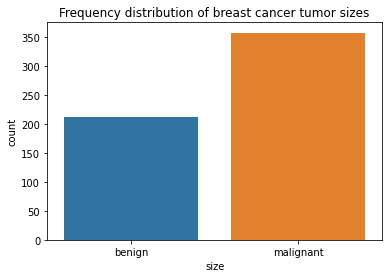

In [ ]:
bar=pd.DataFrame(bc.target,columns=['size'])
di={0:bc.target_names[1],1:bc.target_names[0]}
bar['size']=bar['size'].map(di)
fig, ax = plt.subplots()
ax.set_title('Frequency distribution of breast cancer tumor sizes')
sns.countplot(bar['size'],ax=ax)

Heatmap

Text(0.5, 114.0, '')

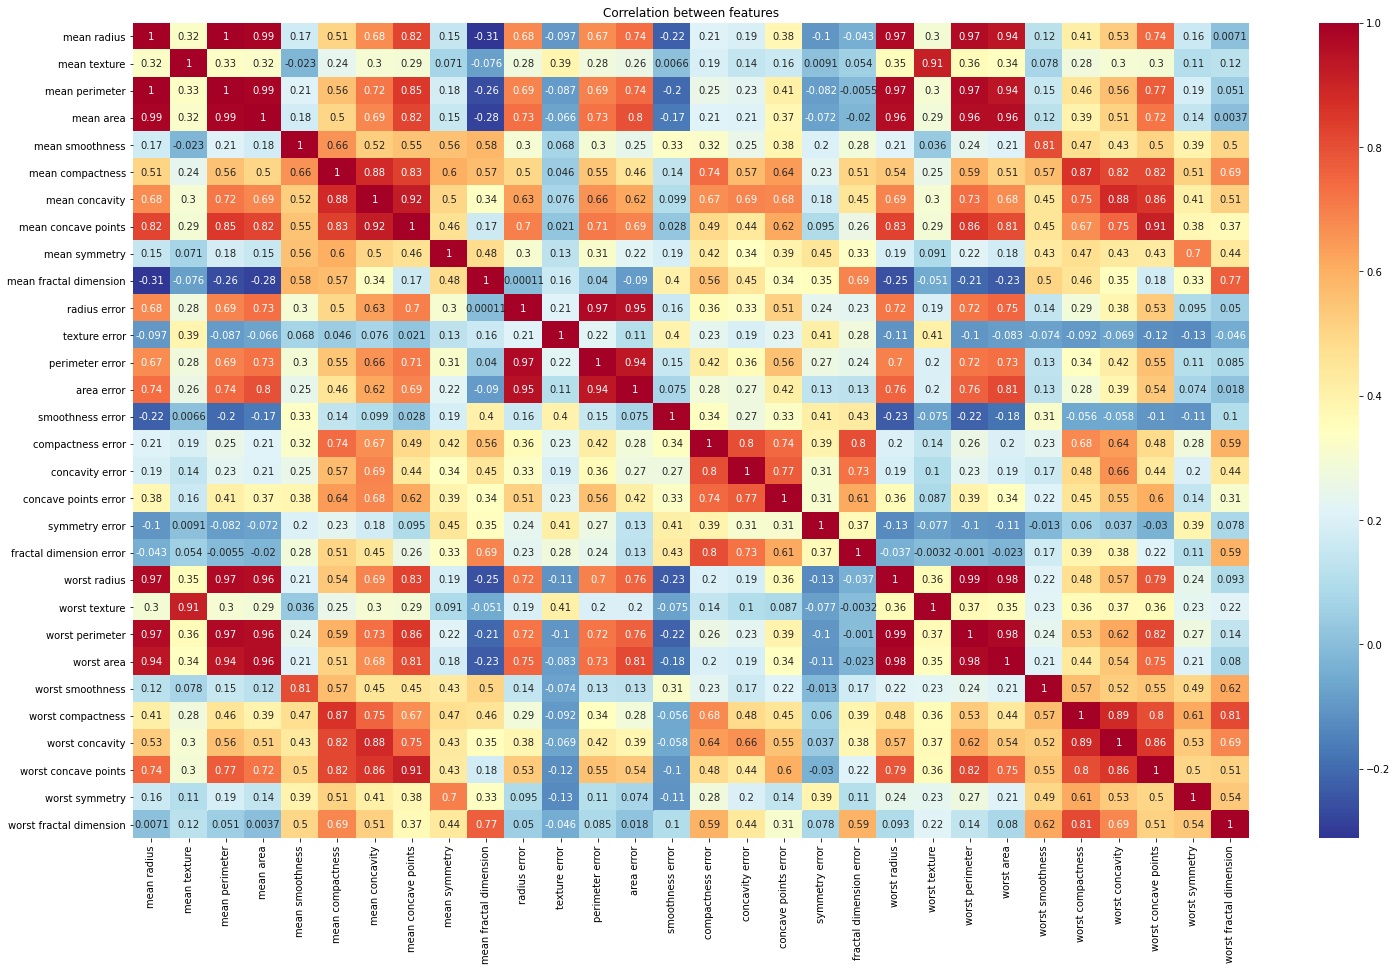

In [ ]:
fig, ax = plt.subplots(figsize=(25,15))
ax.set_title('Correlation between features')
bc_df_corr = bc_df.corr() #correlation matrix
sns.heatmap(bc_df_corr,cmap ='RdYlBu_r',ax=ax, annot=True)
ax.set_ylabel('')
ax.set_xlabel('')

Feature selection by dropping strongly correlated features

In [ ]:
corr_features=set()
for i in range(len(bc_df_corr.columns)):
  for j in range(i):
    if abs(bc_df_corr.iloc[i,j])>0.8:
      corr_features.add(bc_df_corr.columns[i])
print(f'{len(corr_features)} strongly correlated features:\n',corr_features)

17 strongly correlated features:
 {('mean concavity',), ('fractal dimension error',), ('worst compactness',), ('mean concave points',), ('area error',), ('worst radius',), ('worst perimeter',), ('worst concavity',), ('worst concave points',), ('worst fractal dimension',), ('mean perimeter',), ('mean area',), ('concavity error',), ('worst smoothness',), ('perimeter error',), ('worst area',), ('worst texture',)}


In [ ]:
print(bc_df.shape)
bc_df=bc_df.drop(corr_features,axis=1)
print(bc_df.shape)
bc_df

(569, 30)
(569, 13)


,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.02454,0.01114,0.2060
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01678,0.01898,0.2572
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01557,0.01318,0.2218
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.01664,0.02324,0.4087


Train test split

In [ ]:
from sklearn.model_selection import train_test_split
y=pd.DataFrame(bc.target)
X_train, X_test, y_train, y_test = train_test_split(bc_df.to_numpy(), bc.target, test_size=0.3,stratify = y,random_state=100)

Feature Scaling

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Naive Bayes

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
nbAccuracy=metrics.accuracy_score(y_test, y_pred)*100
print("Naive Bayes Accuracy:",nbAccuracy)

Naive Bayes Accuracy: 93.56725146198829


K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#print("Test set predictions:\n", y_pred)
Knnaccuracy=knn.score(X_test, y_test)*100
print("KNN Accuracy:",Knnaccuracy)


KNN Accuracy: 95.90643274853801


Random Forest (RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 120)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=120,
                       verbose=0, warm_start=False)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
conm = confusion_matrix(y_test, Y_pred)
conm

array([[ 62,   2],
       [  6, 101]])

In [ ]:
from sklearn.metrics import accuracy_score
RFaccuracy = accuracy_score(y_test,Y_pred)*100
print("RF Accuracy:",RFaccuracy)

RF Accuracy: 95.32163742690058


Scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b22e38320>,
      dtype=object)

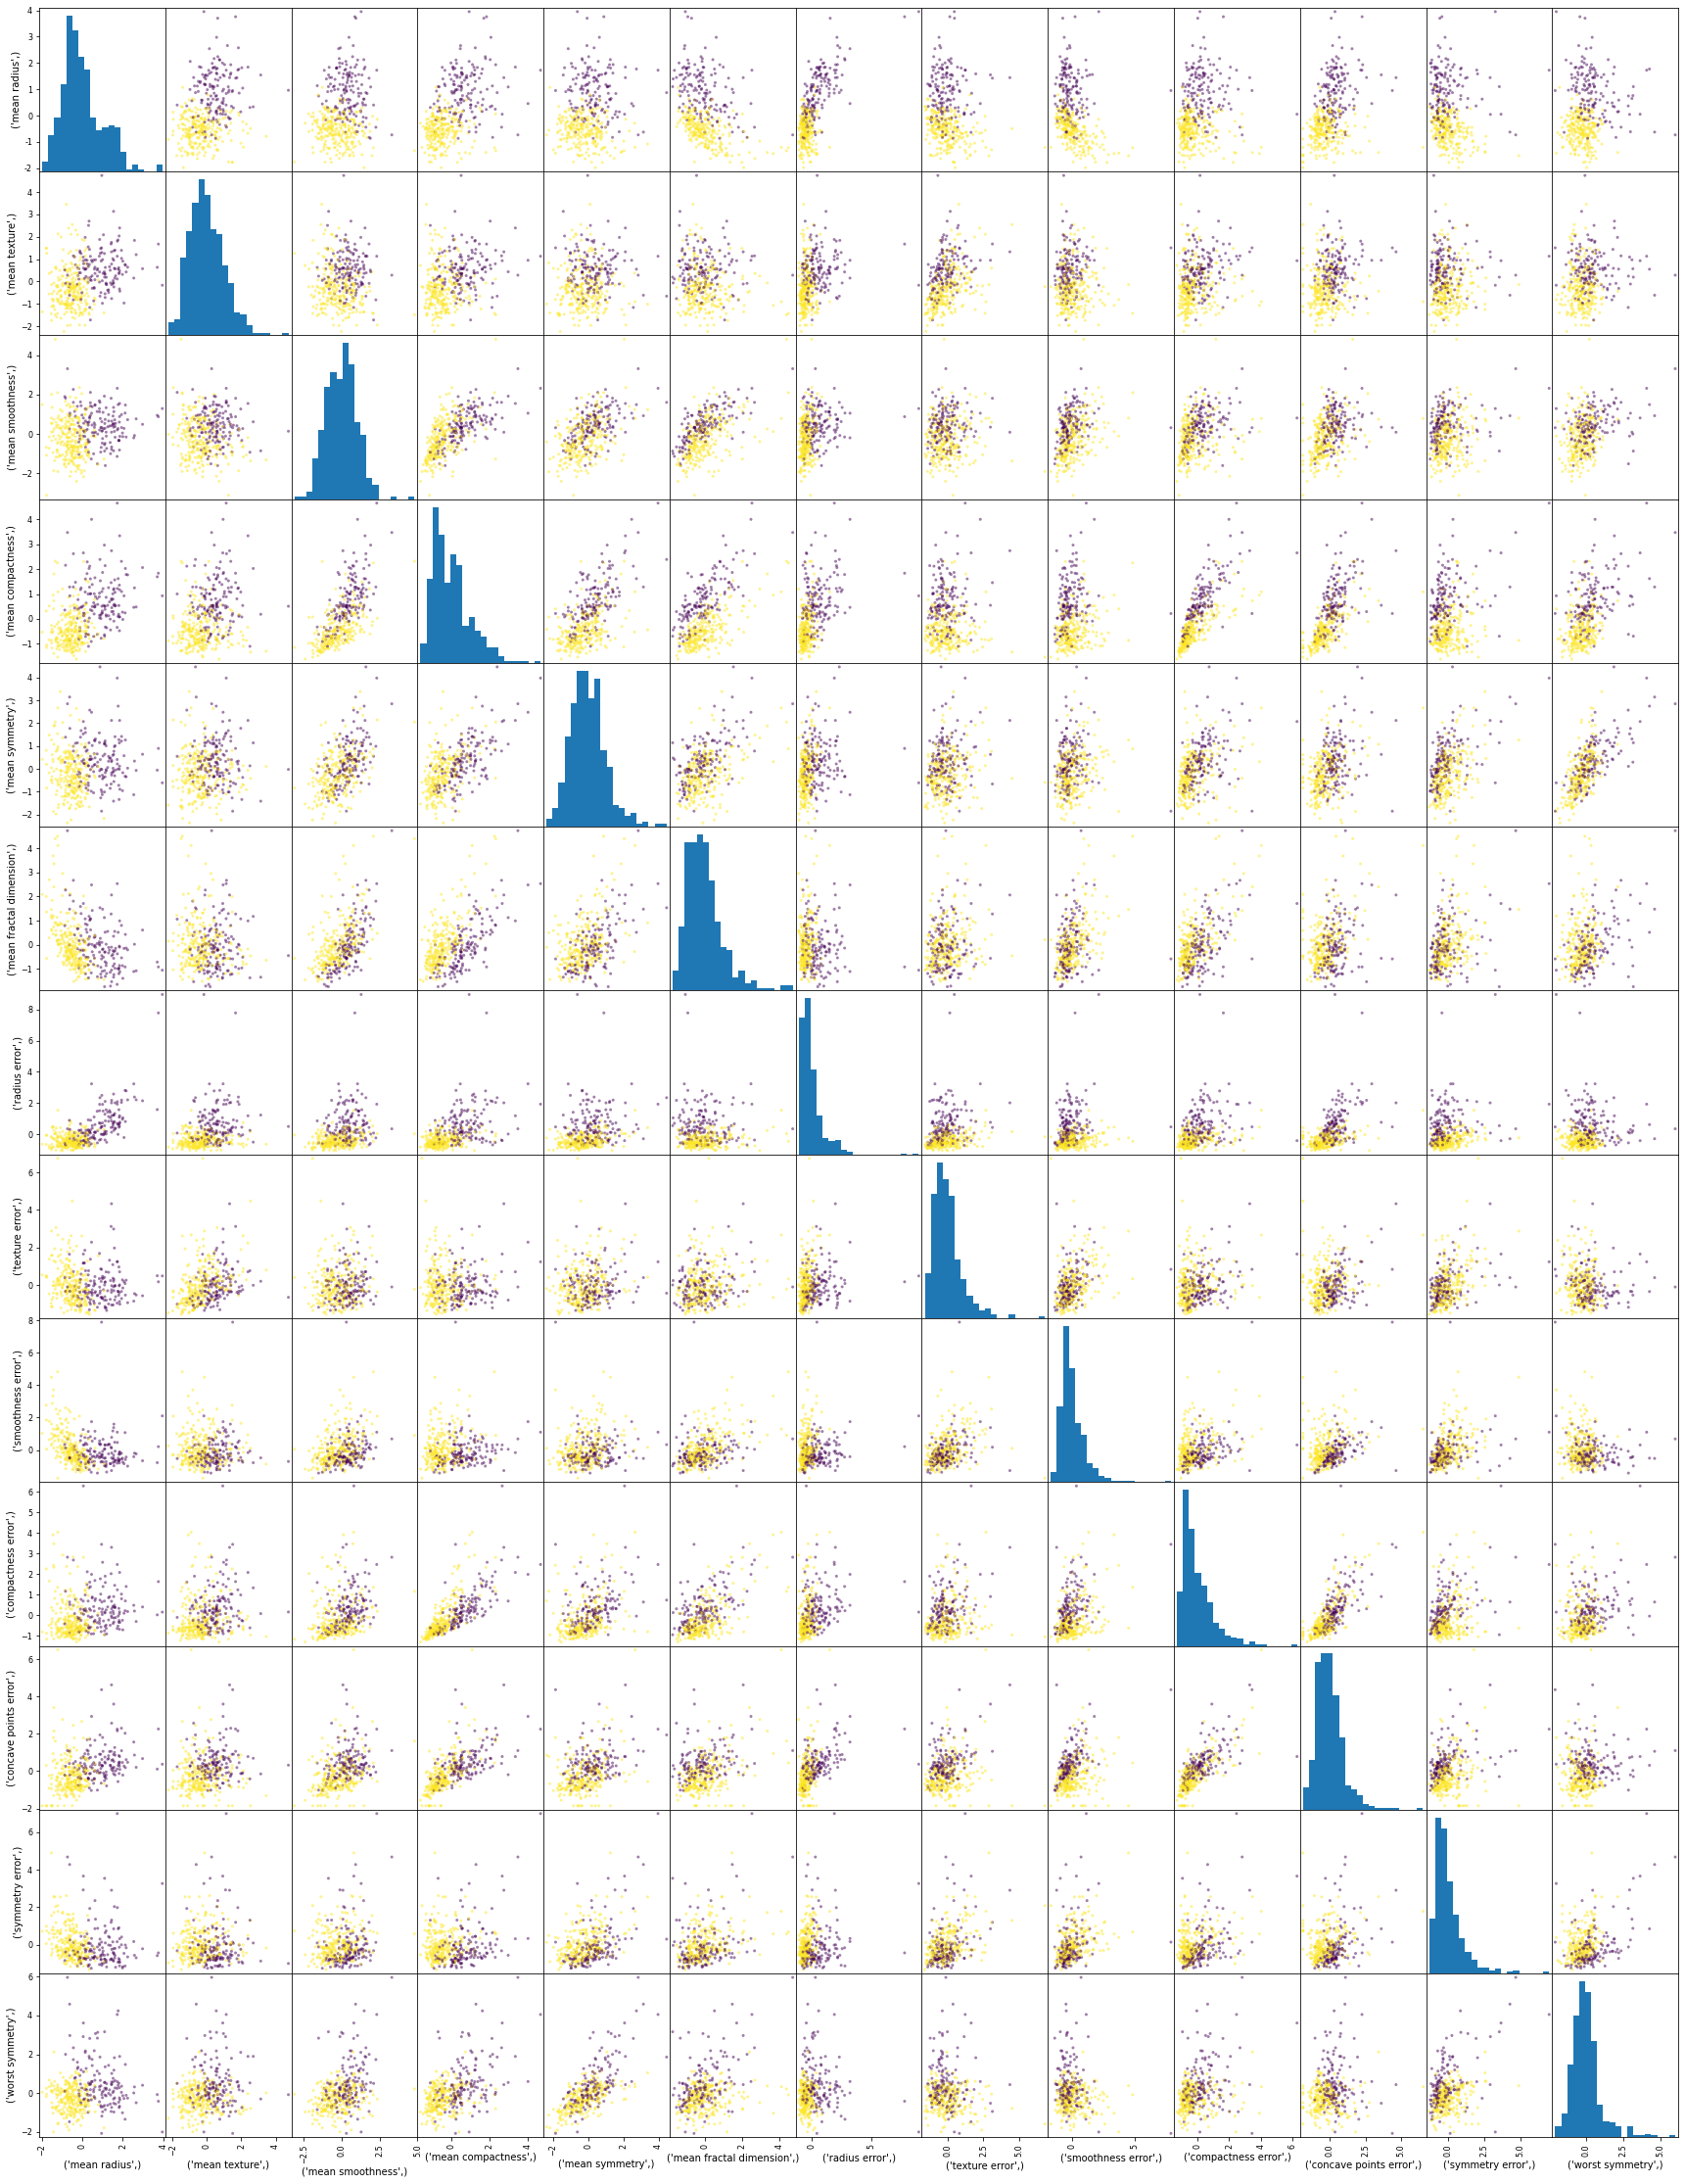

In [ ]:
sc=pd.DataFrame(X_train, columns=bc_df.columns)
pd.plotting.scatter_matrix(sc, c=y_train,figsize=(30,40),hist_kwds={'bins': 20})

Support Vector Machine (SVM) using 'linear' of kernel

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel
#clf = svm.SVC(kernel='rbf')

#Training of the dataset
clf.fit(X_train, y_train)

#Predicting the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics
svmRbfAcc=metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy of SVM using 'linear' of kernel:",svmRbfAcc)

Accuracy of SVM using 'linear' of kernel: 95.32163742690058


In [ ]:
print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9626168224299065
Recall: 0.9626168224299065


Support Vector Machine (SVM) using 'rbf' of kernel

In [ ]:
from sklearn import svm

#clf = svm.SVC(kernel='linear') # Linear Kernel
clf = svm.SVC(kernel='rbf')

#Training of the dataset
clf.fit(X_train, y_train)

#Predicting the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics
svmLinAcc=metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy of SVM using 'rbf' of kernel:",svmLinAcc)

Accuracy of SVM using 'rbf' of kernel: 96.49122807017544


In [ ]:
print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.963302752293578
Recall: 0.9813084112149533


Comparing all the accuracy values,

Text(0.5, 1.0, 'Comparison of different classifier accuracies')

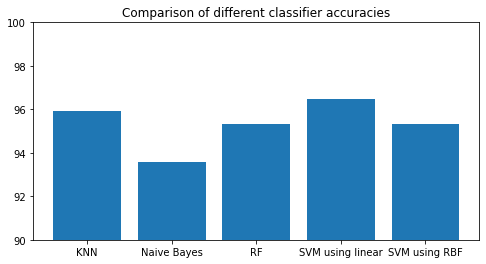

In [ ]:
fig, ax= plt.subplots(figsize=(8,4))
points=['KNN','Naive Bayes','RF','SVM using linear','SVM using RBF']
frequency=[Knnaccuracy,nbAccuracy,RFaccuracy,svmLinAcc,svmRbfAcc]
ax.bar(points,frequency)
ax.set_ylim(90, 100)
ax.set_title('Comparison of different classifier accuracies')

To find classifier with highest accuracy.

In [ ]:
accuracies={'KNN':Knnaccuracy,'Naive Bayes':nbAccuracy,'RF':RFaccuracy,'SVM using linear':svmLinAcc,'SVM using RBF':svmRbfAcc}
maxKey='KNN'
max=Knnaccuracy
for i,v in accuracies.items():
  if v>max:
    max=v
    maxKey=i
print("Maximum accuracy is ",str(accuracies[maxKey])," which comes from ",maxKey," classifier.")

Maximum accuracy is  96.49122807017544  which comes from  SVM using RBF  classifier.
